# 1.1- EDAs - Train.csv

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 'display.float_format' is to change cientific notation. el '%.3f' es para que x tenga sólo 3 decimales. 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# importar el dataset de Train.csv
df = pd.read_csv("datasets/Train.csv")

In [3]:
# mirar los nombres de las columnas
df.head()

# la variable objetivo sería predecir Rating

,ID,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,GPS Status & Toolbox,TRAVEL_AND_LOCAL,1.000,149723,4.1M,"10,000,000+",Free,0,Everyone,Travel & Local,"June 13, 2018",8.1.171,4.0 and up
1,1,Fish|Hunt FL,LIFESTYLE,0.000,853,34M,"100,000+",Free,0,Everyone,Lifestyle,"March 22, 2018",3.2.0,4.1 and up
2,2,Allrecipes Dinner Spinner,FOOD_AND_DRINK,1.000,61881,Varies with device,"5,000,000+",Free,0,Everyone,Food & Drink,"April 10, 2018",Varies with device,Varies with device
3,3,Don't touch my phone,TOOLS,0.000,21943,2.3M,"5,000,000+",Free,0,Everyone,Tools,"October 19, 2016",30,2.3 and up
4,4,BM SPM Practice,FAMILY,1.000,6,9.2M,"1,000+",Free,0,Everyone,Education,"January 24, 2018",1.0,4.1 and up


In [4]:
df.shape

(5788, 14)

* ID = Unique Application Identifier 
* App = Name of the application
* Category = Application category 
* Reviews = Number of reviews of the application 
* Size = Size of the application 
* Installs = Number of downloads/installations on the computer
* Type = Free or Paid
* Price = Price of the application in dollars
* Content rating = Content rating
* Genres = Gender
* Last Updated = Last day to update 
* Current Ver = Current version of the application 
* Android View = Required Android Version
* Rating = Application Rating, if the avg rat >=4 => Rating = 1, else: Rating  = 0

## EDAs content

1. Initial descriptions. Unique values on each categorical feature. Histograms, distributions of all columns
2. Correlation matrix with price (target var)
3. Plotting scatterplots

### 1. Initial descriptions. Unique values on each categorical feature. Histograms, distributions of all columns

In [5]:
## To see the data types
df.dtypes

ID                  int64
App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
## delete Id columns
df.drop('ID', axis=1, inplace=True)

In [7]:
## to get a data visual
df.describe()
## sólo paarece las columnas int64


,Rating,Reviews
count,5788.000,5788.000
mean,0.746,234145.160
std,0.435,2174468.934
min,0.000,0.000
25%,0.000,23.000
50%,1.000,889.000
75%,1.000,26432.500
max,1.000,78158306.000


In [8]:
## to get a data visual
df.describe(include='object')

,App,Category,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,5788,5788,5788,5788,5788,5788,5788,5788,5788,5788,5788
unique,5788,33,358,20,2,68,6,107,1165,1947,31
top,Video.Guru - Video Maker,FAMILY,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,1114,728,841,5323,5323,4764,507,145,620,1317


In [9]:
## to explore nulls
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Value counts graphs

This is usefull for low cardinal variables

In [10]:
def value_counts_graphs(column_name):
    label_freq = df[column_name].value_counts() / len(df) # la frecuencia de cada valor sobre la len para estandarizar
    plotting = label_freq.plot.bar() ## plottear de mayor a menor
    return label_freq, plotting   

(1.000   0.746
 0.000   0.254
 Name: Rating, dtype: float64,
 <AxesSubplot:>)

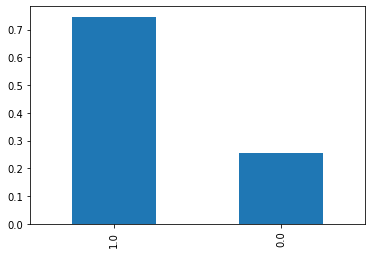

In [11]:
value_counts_graphs('Rating') ## el 74.6% es positivo el Rating, el 25.4% negativo.

<AxesSubplot:>

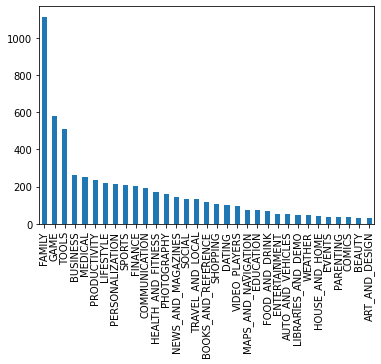

In [56]:
value_counts_graphs('Category') # la gran mayoría de los datos están como clase familia, juegos y herramientas.

In [68]:
df.Category.value_counts()/df.shape[0]*100


FAMILY                19.247
GAME                  10.038
TOOLS                  8.777
BUSINESS               4.561
MEDICAL                4.371
PRODUCTIVITY           4.026
LIFESTYLE              3.784
PERSONALIZATION        3.663
SPORTS                 3.628
FINANCE                3.525
COMMUNICATION          3.369
HEALTH_AND_FITNESS     2.937
PHOTOGRAPHY            2.799
NEWS_AND_MAGAZINES     2.471
SOCIAL                 2.315
TRAVEL_AND_LOCAL       2.298
BOOKS_AND_REFERENCE    2.056
SHOPPING               1.831
DATING                 1.728
VIDEO_PLAYERS          1.624
MAPS_AND_NAVIGATION    1.279
EDUCATION              1.261
FOOD_AND_DRINK         1.158
ENTERTAINMENT          0.916
AUTO_AND_VEHICLES      0.898
LIBRARIES_AND_DEMO     0.847
WEATHER                0.795
HOUSE_AND_HOME         0.726
EVENTS                 0.657
PARENTING              0.657
COMICS                 0.639
BEAUTY                 0.570
ART_AND_DESIGN         0.553
Name: Category, dtype: float64

(1,000,000+       0.145
 100,000+         0.114
 10,000+          0.108
 10,000,000+      0.093
 1,000+           0.093
 100+             0.077
 5,000,000+       0.062
 500,000+         0.053
 50,000+          0.051
 5,000+           0.049
 10+              0.041
 500+             0.033
 50+              0.021
 50,000,000+      0.020
 100,000,000+     0.020
 5+               0.007
 1+               0.006
 500,000,000+     0.003
 1,000,000,000+   0.002
 0+               0.001
 Name: Installs, dtype: float64,
 <AxesSubplot:>)

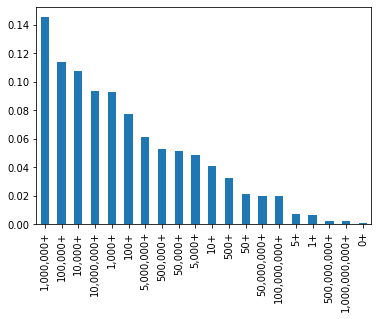

In [59]:
value_counts_graphs('Installs') ##muy uniforme, pero se observa que la media está cerca a 1M

(Free   0.920
 Paid   0.080
 Name: Type, dtype: float64,
 <AxesSubplot:>)

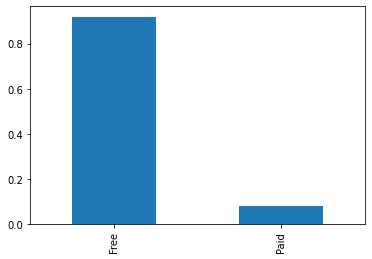

In [14]:
##la mayor parte de las apps son gratis, pero hay que tener especial cuidado con las Paid,
#ya que si alguien paga por una app y no cumple con sus expectativas es más probable que la califique negativamente.
# pero tienden a ser más elaboradas.
value_counts_graphs('Type')

(0         0.920
 $0.99     0.016
 $2.99     0.012
 $4.99     0.009
 $1.99     0.008
            ... 
 $16.99    0.000
 $19.40    0.000
 $109.99   0.000
 $1.96     0.000
 $89.99    0.000
 Name: Price, Length: 68, dtype: float64,
 <AxesSubplot:>)

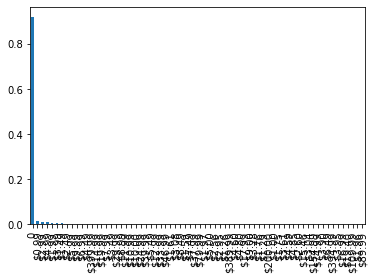

In [81]:
# has not much sense cuz there are too many free apps
value_counts_graphs('Price')

(Everyone          0.823
 Teen              0.103
 Mature 17+        0.040
 Everyone 10+      0.033
 Adults only 18+   0.001
 Unrated           0.000
 Name: Content Rating, dtype: float64,
 <AxesSubplot:>)

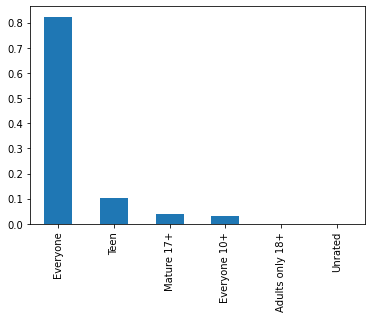

In [15]:
## no tiene mucha importancia, no relaciono el contenido en edad con la calificación
value_counts_graphs('Content Rating')

### Questions to Answer

If ratings are 0 and 1, and 1 == 5 and 0 othe ones and that and taking into account that this is the Ratings distribution: 

```
1   0.746
0   0.254
```

What characteristics the cero ratings has? and what characteristics do the 1 rating has?

* Which categories has more cero ratings and what more one ratings
* What number of reviews has cero ratings and one ratings
* What's the number of installs for zero ratings
* What type do the zero ratings has?
* What price do the zero ratings has?
* What content ratring do the zero ratings has?
* What genres do the zero ratings has?

### Groupings, pivot tables and ploting

This is usefull to see independent variables vs dependent variable.

In [16]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [72]:
def groupby_var_target(df, column_name, target_name, title):
    ## group by sum(ya que ratings es 1 o 0)/group by count(total) 
    groupby_var_target = df.groupby(
        column_name)[target_name].sum() / df.groupby(
        column_name)[target_name].count() * 100.0
    
    ## plot groupby
    ax = groupby_var_target.sort_values(ascending=False).plot(
        kind='bar',
        color='skyblue',
        grid=True,
        figsize=(10, 7),
        title=title
    )
    
    return groupby_var_target, plt.show()

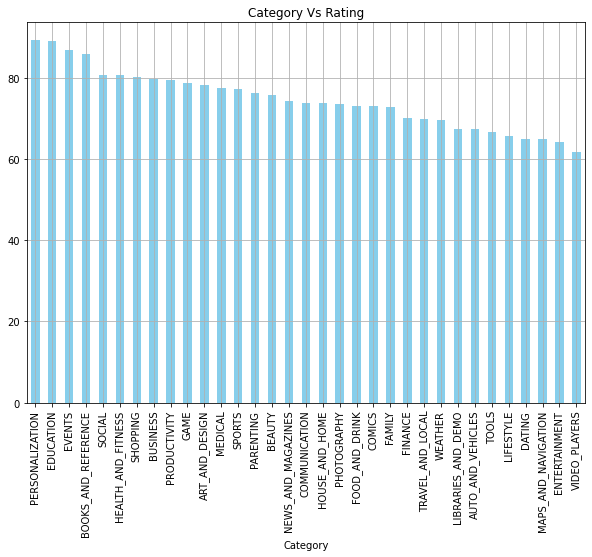

(Category
 ART_AND_DESIGN        78.125
 AUTO_AND_VEHICLES     67.308
 BEAUTY                75.758
 BOOKS_AND_REFERENCE   85.714
 BUSINESS              79.545
 COMICS                72.973
 COMMUNICATION         73.846
 DATING                65.000
 EDUCATION             89.041
 ENTERTAINMENT         64.151
 EVENTS                86.842
 FAMILY                72.711
 FINANCE               70.098
 FOOD_AND_DRINK        73.134
 GAME                  78.657
 HEALTH_AND_FITNESS    80.588
 HOUSE_AND_HOME        73.810
 LIBRARIES_AND_DEMO    67.347
 LIFESTYLE             65.753
 MAPS_AND_NAVIGATION   64.865
 MEDICAL               77.470
 NEWS_AND_MAGAZINES    74.126
 PARENTING             76.316
 PERSONALIZATION       89.151
 PHOTOGRAPHY           73.457
 PRODUCTIVITY          79.399
 SHOPPING              80.189
 SOCIAL                80.597
 SPORTS                77.143
 TOOLS                 66.535
 TRAVEL_AND_LOCAL      69.925
 VIDEO_PLAYERS         61.702
 WEATHER               69.565


In [74]:
## Family, that is the 20% of tha data, has a 72% mean(), same of the mean columns mean.
groupby_var_target(df, 'Category', 'Rating', 'Category Vs Rating')

In [19]:
## to get a data visual
df.describe()

,Rating,Reviews
count,5788.000,5788.000
mean,0.746,234145.160
std,0.435,2174468.934
min,0.000,0.000
25%,0.000,23.000
50%,1.000,889.000
75%,1.000,26432.500
max,1.000,78158306.000


In [20]:
df['review_group'] = df['Reviews'].apply(
    lambda x: '[0, 23)' if x < 23 else '[23, 889)' if x < 889 \
        else '[889, 26432)' if x < 26432  \
        else '[26432+)'
)

In [21]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,review_group
0,GPS Status & Toolbox,TRAVEL_AND_LOCAL,1.000,149723,4.1M,"10,000,000+",Free,0,Everyone,Travel & Local,"June 13, 2018",8.1.171,4.0 and up,[26432+)
1,Fish|Hunt FL,LIFESTYLE,0.000,853,34M,"100,000+",Free,0,Everyone,Lifestyle,"March 22, 2018",3.2.0,4.1 and up,"[23, 889)"
2,Allrecipes Dinner Spinner,FOOD_AND_DRINK,1.000,61881,Varies with device,"5,000,000+",Free,0,Everyone,Food & Drink,"April 10, 2018",Varies with device,Varies with device,[26432+)
3,Don't touch my phone,TOOLS,0.000,21943,2.3M,"5,000,000+",Free,0,Everyone,Tools,"October 19, 2016",30,2.3 and up,"[889, 26432)"
4,BM SPM Practice,FAMILY,1.000,6,9.2M,"1,000+",Free,0,Everyone,Education,"January 24, 2018",1.0,4.1 and up,"[0, 23)"


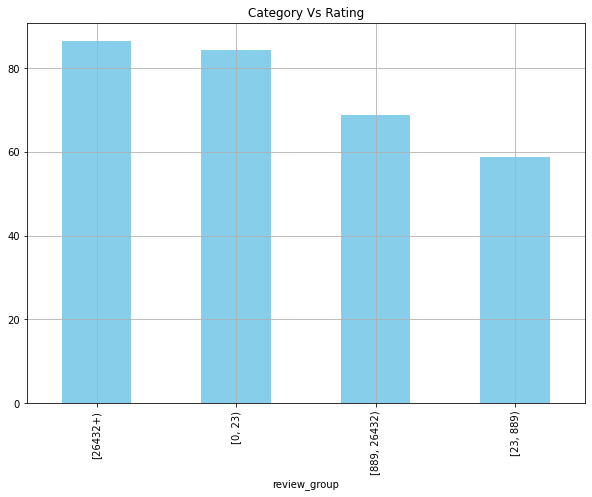

(review_group
 [0, 23)        84.390
 [23, 889)      58.848
 [26432+)       86.524
 [889, 26432)   68.785
 Name: Rating, dtype: float64,
 None)

In [22]:
groupby_var_target(df, 'review_group', 'Rating', 'Category Vs Rating')

In [23]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'review_group'],
      dtype='object')

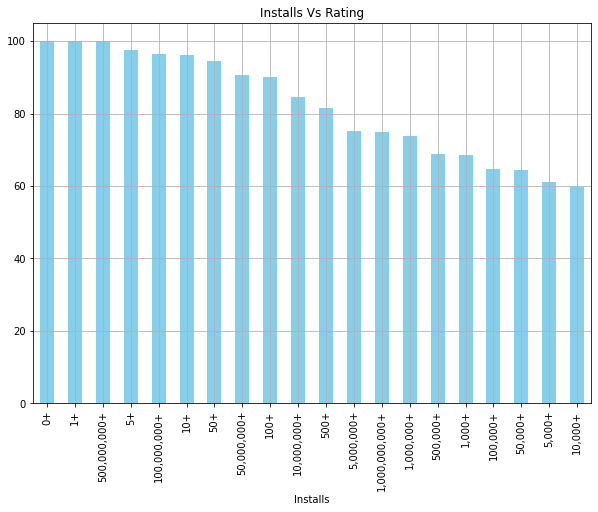

(Installs
 0+               100.000
 1+               100.000
 1,000+            68.657
 1,000,000+        73.841
 1,000,000,000+    75.000
 10+               96.203
 10,000+           59.711
 10,000,000+       84.473
 100+              89.955
 100,000+          64.750
 100,000,000+      96.491
 5+                97.619
 5,000+            60.993
 5,000,000+        75.281
 50+               94.355
 50,000+           64.430
 50,000,000+       90.517
 500+              81.579
 500,000+          68.831
 500,000,000+     100.000
 Name: Rating, dtype: float64,
 None)

In [24]:
groupby_var_target(df, 'Installs', 'Rating', 'Installs Vs Rating')

In [25]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'review_group'],
      dtype='object')

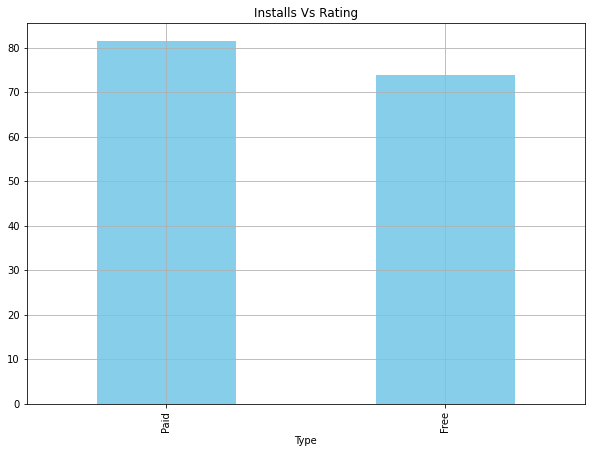

(Type
 Free   73.981
 Paid   81.505
 Name: Rating, dtype: float64,
 None)

In [26]:
## Paid type has 81.5% good rating califications, those might be more elaborated, but people must be stricter.
groupby_var_target(df, 'Type', 'Rating', 'Installs Vs Rating')

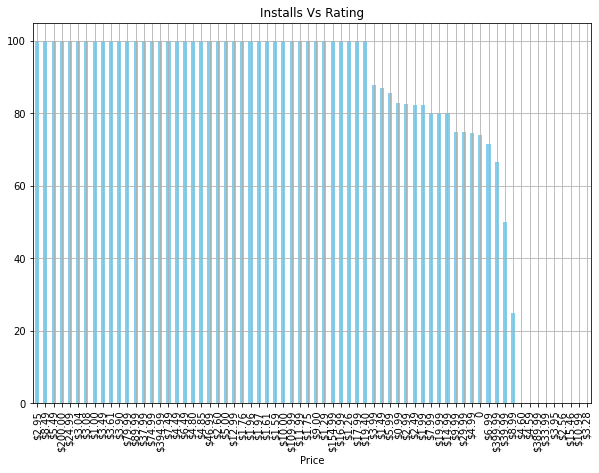

(Price
 $0.99     82.796
 $1.00    100.000
 $1.26    100.000
 $1.29    100.000
 $1.49     87.097
            ...  
 $8.99     25.000
 $89.99   100.000
 $9.00    100.000
 $9.99     75.000
 0         73.981
 Name: Rating, Length: 68, dtype: float64,
 None)

In [76]:
groupby_var_target(df, 'Price', 'Rating', 'Installs Vs Rating') ## pasarlo a rangos.

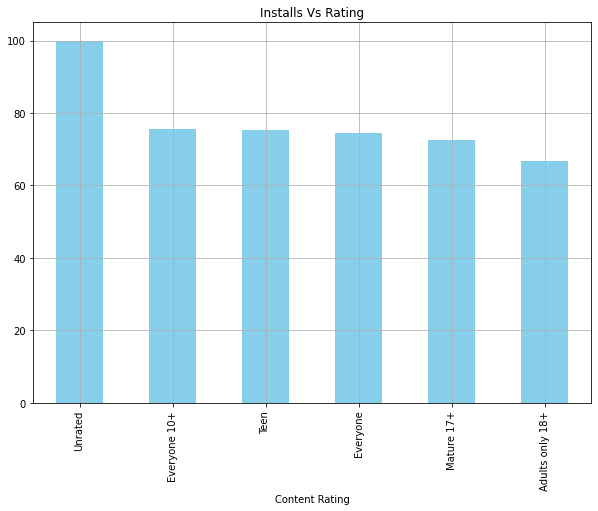

(Content Rating
 Adults only 18+    66.667
 Everyone           74.559
 Everyone 10+       75.661
 Mature 17+         72.650
 Teen               75.209
 Unrated           100.000
 Name: Rating, dtype: float64,
 None)

In [28]:
groupby_var_target(df, 'Content Rating', 'Rating', 'Installs Vs Rating')

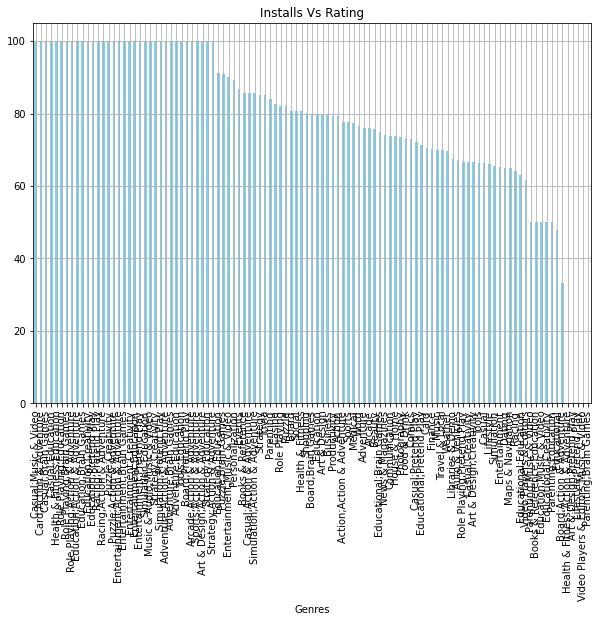

(Genres
 Action                                   79.330
 Action;Action & Adventure                77.778
 Adventure                                76.000
 Adventure;Action & Adventure            100.000
 Adventure;Brain Games                   100.000
                                           ...  
 Trivia                                   85.000
 Video Players & Editors                  61.702
 Video Players & Editors;Music & Video     0.000
 Weather                                  69.565
 Word                                     76.471
 Name: Rating, Length: 107, dtype: float64,
 None)

In [29]:
groupby_var_target(df, 'Genres', 'Rating', 'Installs Vs Rating')

In [30]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'review_group'],
      dtype='object')

In [31]:
def groupby_2_cols_against_target(df, column1, column2, target):

    groupby_2_cols_against_target = df.groupby(
        [column1, column2]
    )[target].sum() / df.groupby(
        [column1, column2]
    )[target].count() * 100.0

    pivot_t = groupby_2_cols_against_target.reset_index().pivot(
        index=column1,
        columns=column2,
        values=target
    )
    
    return pivot_t

In [85]:
groupby_2_cols_against_target(df, "Category", "Type", "Rating")



Type,Free,Paid
Category,,
ART_AND_DESIGN,77.419,100.000
AUTO_AND_VEHICLES,66.667,100.000
BEAUTY,75.758,NaN
BOOKS_AND_REFERENCE,85.577,86.667
BUSINESS,79.457,83.333
COMICS,72.973,NaN
COMMUNICATION,74.432,68.421
DATING,65.263,60.000
EDUCATION,88.406,100.000


In [33]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'review_group'],
      dtype='object')

In [34]:
groupby_2_cols_against_target(df, "Installs", "Content Rating", "Rating")

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Installs,,,,,,
0+,NaN,100.000,NaN,NaN,100.000,NaN
1+,NaN,100.000,NaN,100.000,100.000,NaN
"1,000+",NaN,68.399,55.556,83.333,70.588,NaN
"1,000,000+",100.000,75.804,68.293,71.429,64.423,NaN
"1,000,000,000+",NaN,87.500,NaN,NaN,50.000,NaN
10+,NaN,96.190,100.000,85.714,100.000,NaN
"10,000+",NaN,58.442,81.250,59.091,67.391,NaN
"10,000,000+",NaN,84.444,82.759,86.667,84.416,NaN
100+,NaN,89.717,83.333,86.667,94.737,NaN


In [35]:
groupby_2_cols_against_target(df, "Installs", "Type", "Rating")

Type,Free,Paid
Installs,,
0+,100.000,100.000
1+,100.000,100.000
"1,000+",68.874,67.470
"1,000,000+",73.366,100.000
"1,000,000,000+",75.000,NaN
10+,96.429,95.122
"10,000+",57.246,78.873
"10,000,000+",84.444,100.000
100+,91.560,78.947


In [36]:
groupby_2_cols_against_target(df, "Installs", "review_group", "Rating")

review_group,"[0, 23)","[23, 889)",[26432+),"[889, 26432)"
Installs,,,,
0+,100.000,NaN,NaN,NaN
1+,100.000,NaN,NaN,NaN
"1,000+",65.902,72.294,NaN,NaN
"1,000,000+",NaN,57.143,86.667,65.675
"1,000,000,000+",NaN,NaN,75.000,NaN
10+,96.203,NaN,NaN,NaN
"10,000+",64.706,56.545,NaN,89.286
"10,000,000+",NaN,0.000,86.898,28.571
100+,89.862,92.857,NaN,NaN


### Graph Outliers

<AxesSubplot:>

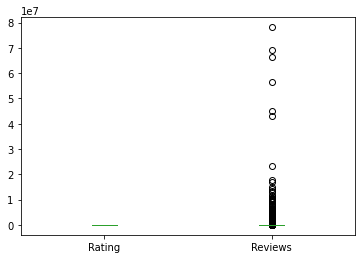

In [37]:
df.plot.box()

<AxesSubplot:>

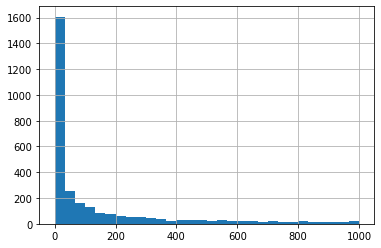

In [38]:
df['Reviews'].hist(bins=30, range=(0, 1000))

<AxesSubplot:>

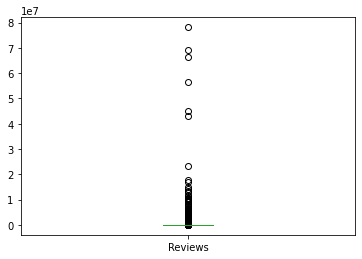

In [39]:
df['Reviews'].plot.box()

In [40]:
## to graph outliers

def graph_outliers(column_names):
    for column_name in column_names:
        plt.figure(figsize=(3,6))
        sns.boxplot(y=df[column_name])

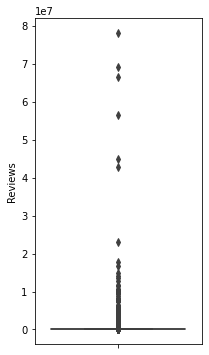

In [41]:
graph_outliers(['Reviews'])

C:\Users\porta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Reviews'}>]], dtype=object)

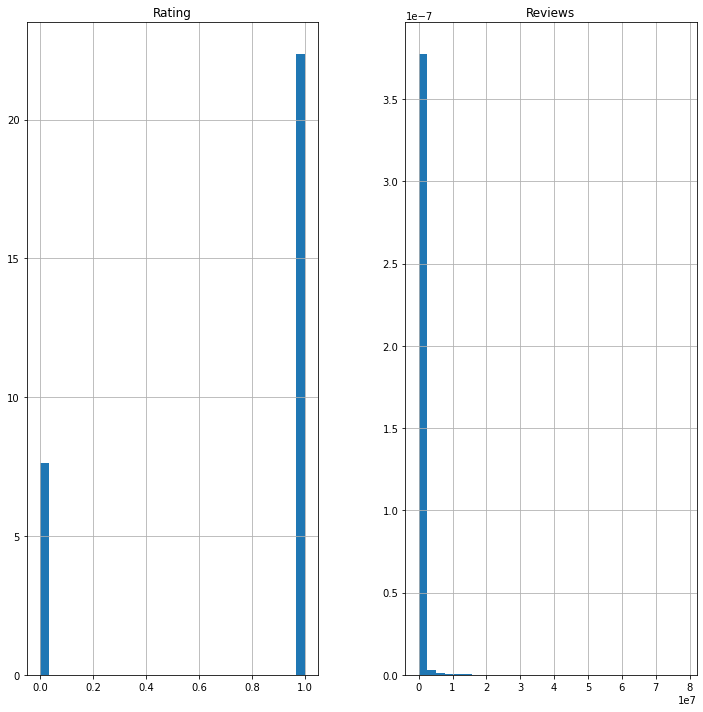

In [42]:
## to plot hist to all dataframe
df.hist(bins=30, figsize=(12,12), density=True)

### Correlation matrix with price (target var)

In [43]:
df.corr()

,Rating,Reviews
Rating,1.000,0.047
Reviews,0.047,1.000


,Rating,Reviews
Rating,1.000,0.047
Reviews,0.047,1.000


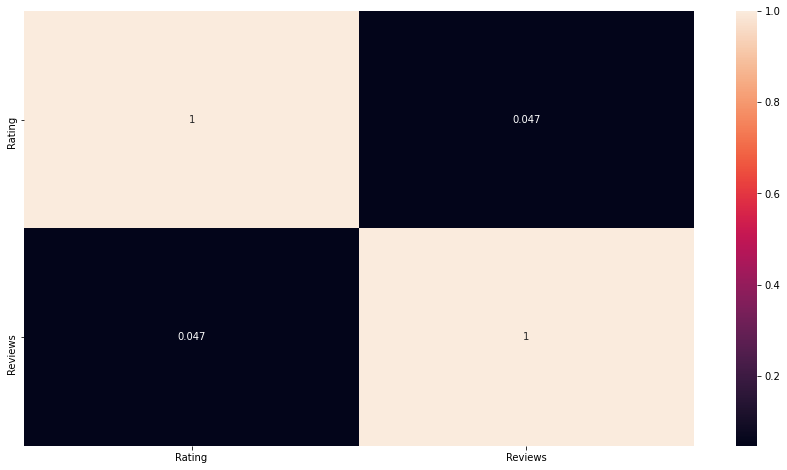

In [44]:
## confusion matriz with seaborn
corr = df.corr()
plt.figure(figsize=(15,8))

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)

corr

In [45]:
## categorical correlation

cat_coor = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

In [46]:
cat_coor

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,review_group
App,1.000,0.006,-0.003,0.519,0.055,0.009,0.004,0.046,-0.019,0.005,0.233,0.313,0.010,0.006
Category,0.006,1.000,-0.055,0.019,-0.013,0.005,-0.044,-0.022,0.069,0.555,-0.082,0.007,-0.016,-0.017
Rating,-0.003,-0.055,1.000,0.016,0.052,-0.084,-0.047,-0.030,0.003,-0.058,0.090,0.011,0.057,-0.009
Reviews,0.519,0.019,0.016,1.000,-0.051,-0.117,-0.085,-0.059,0.081,0.090,-0.019,0.330,-0.016,-0.459
Size,0.055,-0.013,0.052,-0.051,1.000,-0.002,0.056,0.036,-0.023,0.013,0.171,0.067,0.132,0.097
Installs,0.009,0.005,-0.084,-0.117,-0.002,1.000,0.030,0.032,-0.017,-0.022,0.000,-0.030,-0.004,0.283
Type,0.004,-0.044,-0.047,-0.085,0.056,0.030,1.000,0.636,-0.023,0.030,0.114,-0.032,0.053,0.111
Price,0.046,-0.022,-0.030,-0.059,0.036,0.032,0.636,1.000,-0.025,-0.014,0.114,-0.020,0.039,0.087
Content Rating,-0.019,0.069,0.003,0.081,-0.023,-0.017,-0.023,-0.025,1.000,0.054,-0.056,0.037,-0.027,-0.093
Genres,0.005,0.555,-0.058,0.090,0.013,-0.022,0.030,-0.014,0.054,1.000,-0.051,0.028,-0.025,-0.082


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,review_group
App,1.000,-0.190,-0.118,0.725,-0.102,-0.206,-0.232,-0.172,-0.147,-0.161,0.180,0.500,-0.154,-0.310
Category,-0.190,1.000,-0.227,-0.009,-0.199,-0.108,-0.233,-0.232,0.077,0.825,-0.363,-0.100,-0.201,-0.175
Rating,-0.118,-0.227,1.000,-0.034,0.017,-0.249,-0.205,-0.186,-0.070,-0.235,0.078,-0.075,0.037,-0.087
Reviews,0.725,-0.009,-0.034,1.000,-0.215,-0.380,-0.322,-0.274,0.112,0.081,-0.168,0.589,-0.143,-0.792
Size,-0.102,-0.199,0.017,-0.215,1.000,-0.101,-0.030,-0.061,-0.196,-0.175,0.219,-0.064,0.155,0.128
Installs,-0.206,-0.108,-0.249,-0.380,-0.101,1.000,-0.012,-0.020,-0.148,-0.174,-0.081,-0.248,-0.113,0.481
Type,-0.232,-0.233,-0.205,-0.322,-0.030,-0.012,1.000,0.888,-0.199,-0.161,0.107,-0.285,-0.030,0.179
Price,-0.172,-0.232,-0.186,-0.274,-0.061,-0.020,0.888,1.000,-0.200,-0.201,0.108,-0.256,-0.051,0.144
Content Rating,-0.147,0.077,-0.070,0.112,-0.196,-0.148,-0.199,-0.200,1.000,0.058,-0.285,0.001,-0.180,-0.288
Genres,-0.161,0.825,-0.235,0.081,-0.175,-0.174,-0.161,-0.201,0.058,1.000,-0.336,-0.061,-0.218,-0.278


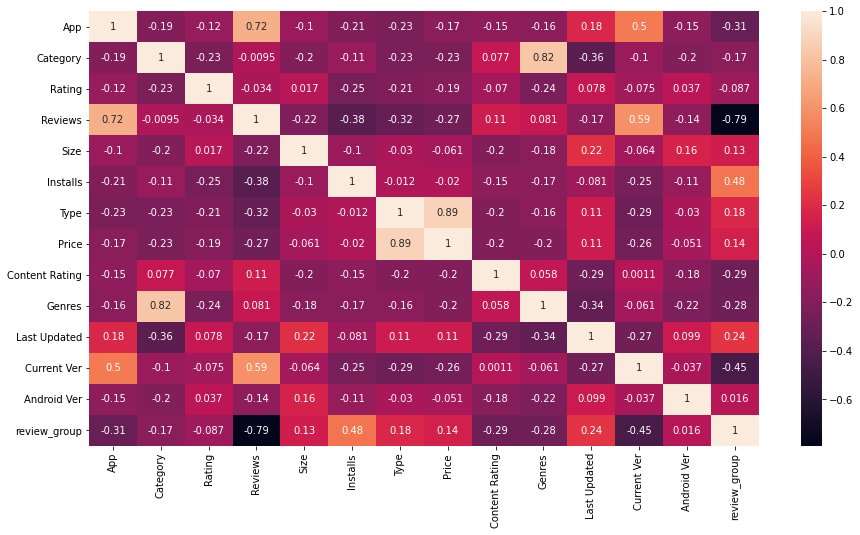

In [47]:
## confusion matriz with seaborn
corr = cat_coor.corr()
plt.figure(figsize=(15,8))

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)

corr

### Plotting scatterplots with target

In [48]:
def scatter_plot_target(column_names, target):
    for column_name in column_names:
        plt.scatter(df[column_name], df[target])
        plt.show()

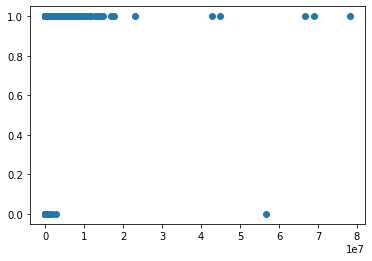

In [49]:
scatter_plot_target(['Reviews'], 'Rating')

## Export Dataset

In [50]:
df.to_csv('datasets/TrainDataAnalysis.csv', index=False)